# $\Psi$ Method - Sigmoid

The method updates the posterior probability distribution across the sampled space of the psychometric functions based on Bayes' rule (Hall, 1968; Watson & Pelli, 1983). The space of the psychometric functions is two-dimensional (Watson and Pelli, 1983; King-Smith & Rose, 1997). Evaluation of the psychometric function is based on computing the mean of the posterior probability distribution (Emerson, 1986; King-Smith et al., 1994). The termination rule is based on the number of trials, as the most practical option (Watson & Pelli, 1983; King-Smith et al., 1994). The placement of each new trial is based on one-step ahead minimum search (King-Smith, 1984) of the expected entropy cost function (Pelli, 1987b).

https://christophertyler.org/CWTyler/Pubtopics/PsiMethod/Psi.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def SIGMOID(x,th,b,g=0.5,d=0.02):
    
    # x   disparity level
    # th  threshold
    # b   slope
    # g   guess rate
    # d   lapse rate
    
    y = g +(1-g)*1/(1+np.exp(-b*(x-th)))
    
    return y

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

## A) Initialize lookup table $p(r_x|\theta)$ $\ \ \forall$ $\theta,x,r_x \ \ \ $and flat prior $p(\theta)$

In [2]:
nStim = 100
nVal = 20
nPar = 2     # th,b

# All disparity levels
x_space = np.logspace(-4,0,nStim)

# All possible values of parameters (th,b)...
theta_space = np.zeros((nVal,nPar))
theta_space[:,0] = np.logspace(-3,-1,nVal)   # th
theta_space[:,1] = np.logspace(0,1,nVal)     # b

# ...and combinations (param vectors)
nVec = nVal**nPar
theta_vector = np.zeros((nVec,nPar))
for p in range(nPar):
    theta_vector[:,p] = np.tile(np.repeat(theta_space[:,p],nVal**(nPar-p-1)),nVal**p)

# Probability of response (success) to stimulus x, given parameters (theta)... p(failure) = 1-p(success)
psi = np.zeros((nStim,nVec))
for i,[th,b] in enumerate(theta_vector):
    psi[:,i] = SIGMOID(x_space,th,b)
    
prior = np.ones(nVec)/nVec

# List of posterior update
POSTERIOR = []

# Real disparity values and responses
response = [1,1,0,1,1,1,0,1,1,0,0,1,0,0,0,1]
disparityLevels_ = [0.02434273 , 0.01217136 , 0 , 0.03651409 , 0.01217136 , 0.02434273 , 0 , 0.03651409 ,-0.001069272 , 0.000534636 , 0 , 0.001603908 , 0.000534636 , 0 , 0.001069272 ,  0.001603908]
disparityLevels = []

for dl in disparityLevels_:
    disparityLevels.append(find_nearest(x_space,dl))

## B) For each trial:

# NO:
### { 
### 1) Compute $p_t(r_x) = \sum\limits_{\theta}p_t(\theta)*p(r_x|\theta)$ $\ \ \forall$ $x,r_x$
### 2) Compute posterior $p_t(\theta|r_x) = \frac{p_t(\theta)*p(r_x|\theta)}{p_t(r_x)}$ $\ \ \forall$ $\theta,x,r_x$
### 3) Compute posterior entropy $H_t(\Theta|r_x) = -\sum\limits_{\theta}p_t(\theta|r_x)*log \ p_t(\theta|r_x) $ $\ \ \forall$ $x,r_x$
### 4) Compute expected posterior entropy $H_t(\Theta|R_x) = \sum\limits_{r_x}p_t(r_x)*H(\Theta|r_x) $ $\ \ \forall$ $x$
### 5) Find $x_{next} = arg\min\limits_{x} H_t(\Theta|R_x) $ 
### }

### 6) Show next stimulus and collect response $r^{t}_{x_{next}}$

### 7) Update prior distribution $p_{t+1}(\theta) = p_{t}(\theta|r^{t}_{x_{next}})$ $\ \ \forall$ $\theta$

In [3]:
nTrial = 16

for t in range(nTrial):
    
    p_success = np.matmul(psi,prior)
    p_failure = 1-p_success

    ind_next = disparityLevels[t]
    r = response[t]

    if r:
        prior = psi[ind_next,:]*prior/p_success[ind_next]
    else:
        prior = (1-psi[ind_next,:])*prior/p_failure[ind_next]
        
    POSTERIOR.append(prior)

## C) Estimate parameters

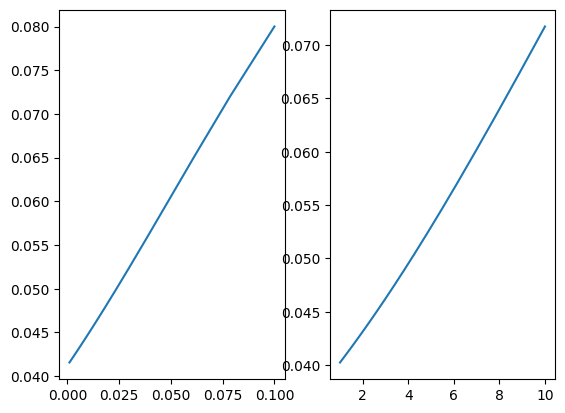

th estimated = 0.03
b estimated = 4.48


In [4]:
p_theta = np.zeros((nVal,nPar))

for i in range(nVal):
        for p in range(nPar):
            ind = np.arange(nVec/nVal**(nPar-p-1))
            tmp = np.repeat(ind%nVal,nVal**(nPar-p-1))
            x = np.argwhere(tmp==i)
            p_theta[i,p] = sum(prior[x])

plt.subplot(121)
plt.plot(theta_space[:,0],p_theta[:,0])
plt.subplot(122)
plt.plot(theta_space[:,1],p_theta[:,1])
plt.show()

th_est, b_est =  sum(theta_space[:,0]*p_theta[:,0]) , sum(theta_space[:,1]*p_theta[:,1])
print(f'th estimated = {th_est:.2f}\nb estimated = {b_est:.2f}')